# Nearest-neighbour Ising Model

We consider here a chain made of $N$ spins $\sigma_i$ that each take the value $1$ or $-1$ if the spin at site $i$ is up or down. We will assume that the chain is periodic, therefore identifying $\sigma_{N+1} = \sigma_1$.

The energy for a particular configuration denoted by $\sigma = {\sigma_i}_1^N$ is given by:
$$ E(\sigma) = J \sum_{i=1}^{N} \sigma_i \sigma_{i+1} + B\sum_{i=1}^{N} \sigma_i $$

\begin{aligned}
    Z_N &= \sum_{\sigma}e^{-E(\sigma)/T}\\
    &= \sum_{\sigma}e^{\frac{-B\sigma_1}{T}}e^{\frac{-J\sigma_1\sigma_2}{T}}...\\
    &= \sum_{\sigma}(e^{\frac{-B\sigma_1}{2T}}e^{\frac{-J\sigma_1\sigma_2}{T}}e^{\frac{-B\sigma_2}{2T}})(...)(e^{\frac{-B\sigma_N}{2T}}e^{\frac{-J\sigma_N\sigma_1}{T}}e^{\frac{-B\sigma_1}{2T}})
\end{aligned}

We can note that the factor in parenthesis takes 3 different values: 
- $e^{\frac{-B-J}{T}}$ if $\sigma_i = \sigma_{i+1} = 1$
- $e^{\frac{B-J}{T}}$ if $\sigma_i = \sigma_{i+1} = -1$
- $e^{\frac{J}{T}}$ if $\sigma_i \ne \sigma_{i+1}$



We define the matrix M as:
$$ \begin{pmatrix}
    e^{\frac{-B-J}{T}} & e^{\frac{J}{T}}\\
    e^{\frac{J}{T}} & e^{\frac{B-J}{T}}
\end{pmatrix} $$

Denoting the first line and column as $1$ and the second as $-1$:
$$ Z_N = \sum_{\sigma} M_{\sigma_1\sigma_2}M_{\sigma_2\sigma_3}...M_{\sigma_{N-1}\sigma_N}M_{\sigma_N\sigma_1}$$

## Partition function

2.7165103527868673

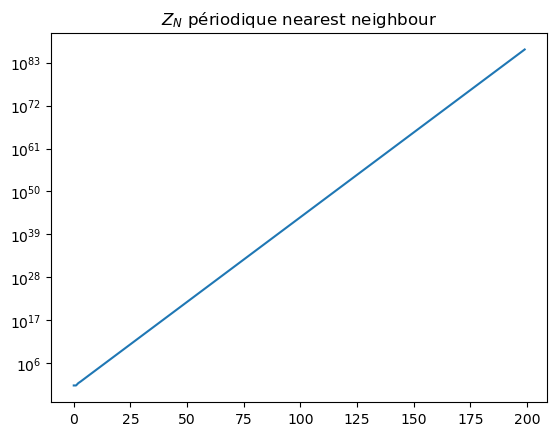

In [76]:
import numpy as np
import matplotlib.pyplot as plt

def val_propre(B,J,T):
    X = np.exp((B-J)/T)
    Y = np.exp((-B-J)/T)
    return (X+Y+np.sqrt((X+Y)**2 + 8*np.cosh(2*J/T)))/2

def Z(N, B, J, T):
    X = np.exp((B-J)/T)
    Y = np.exp((-B-J)/T)
    return ((1+np.sqrt(1+8*np.cosh(2*J/T)/(X+Y)**2))**N+(1-np.sqrt(1+8*np.cosh(2*J/T)/(X+Y)**2))**N)*((X+Y)/2)**N

N = 200
B = 1
J = 2
T = 200

Ns = np.arange(0, N)
ZN = Z(Ns, B, J, T)
plt.yscale('log')
plt.plot(Ns, ZN)
plt.title("$Z_N$ périodique nearest neighbour")
np.polyfit(Ns, np.log(ZN), 1)

val_propre(B,J,T)

$\log Z_N = e^{\phi(B, J, T)N}$